In [1]:
# import warings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

### Reading and understanding data

In [3]:
# read dataset
day_df= pd.read_csv('day.csv')

In [4]:
# viewing sample data
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# checking dataframe shape
day_df.shape

(730, 16)

In [6]:
#dataframe details
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
#columns info
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Data quality check

In [8]:
#checking for null values
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### no null values/missing values

In [9]:
# remaning few columns for better understanding
day_df.rename(columns={'mnth':'Month','yr':'Year','hum':'Humidity'},inplace=True)

In [10]:
day_df.head()

,instant,dteday,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [11]:
# checking if there are any duplicate values
day_df_copy=day_df.copy()

In [12]:
day_df_copy.drop_duplicates(subset=None,inplace=True)

In [13]:
day_df_copy.shape

(730, 16)

### No duplicates  in the data

### Deleting unwanted columns
### 1. dteday : since we have month and year as separate columns we can delete this
### 2. instant : it is index value
### 3. Casual ,registered are count of bike with separate categories 


In [14]:
day_df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [15]:
# mapping coloumns with appropiate names
day_df.season=day_df.season.map({1:'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [16]:
day_df.Month=day_df.Month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})

In [17]:
day_df.weekday=day_df.weekday.map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

In [18]:
day_df.weathersit=day_df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

### Data visualising

In [19]:
# function to create graphs

def Plotting_cat_col(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.boxplot(x=column,y='cnt',data=day_df)
    plt.subplot(1,2,2)
    sns.barplot(column,'cnt',data=day_df, hue='Year',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()

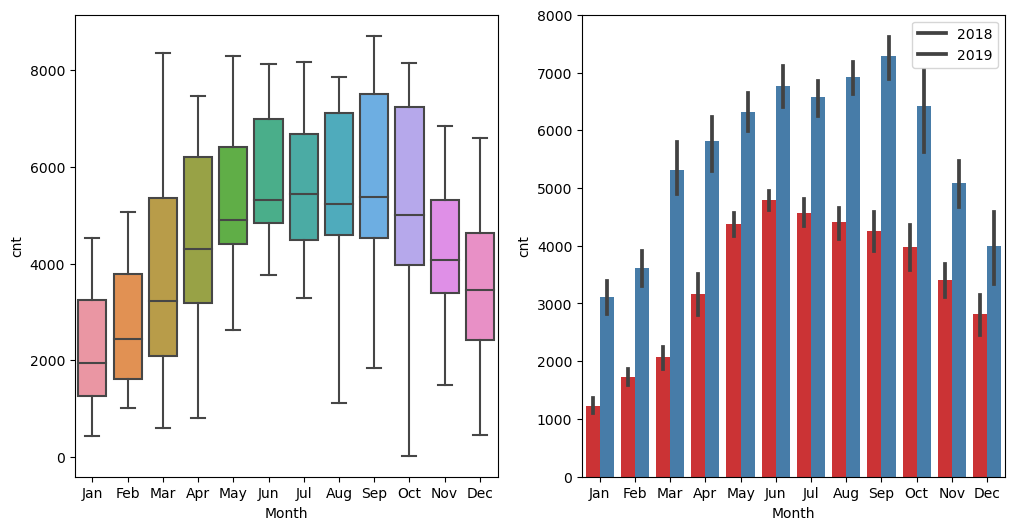

In [20]:
#plotting for month
Plotting_cat_col('Month')

#### Seems like september has high bookings and most booking are from may to october.

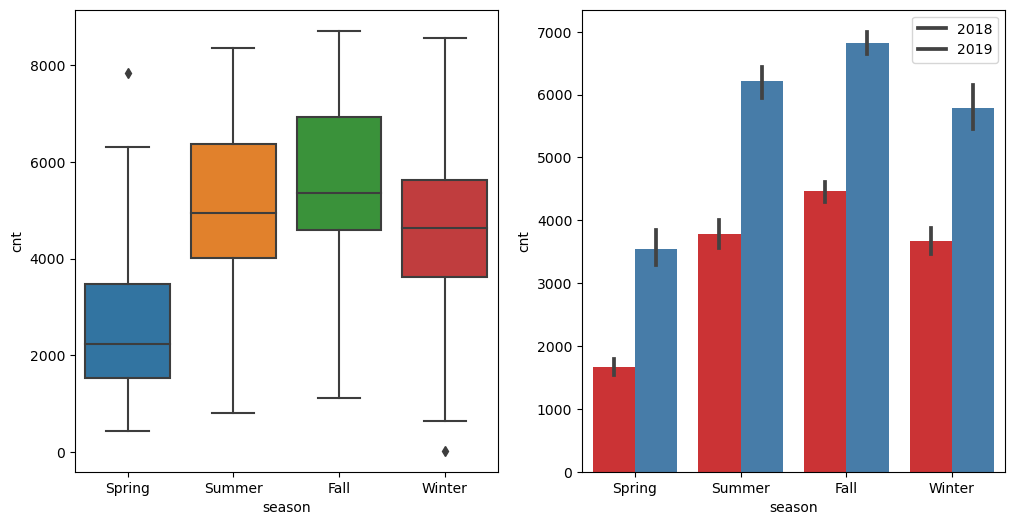

In [21]:
Plotting_cat_col('season')

#### Fall has many bookings and summer comes next

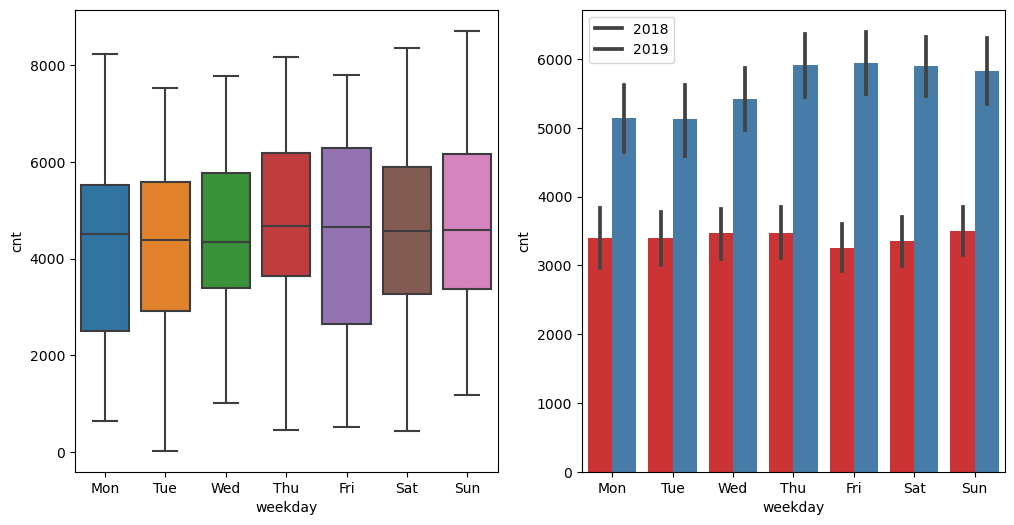

In [22]:
Plotting_cat_col('weekday')

#### from thrusday to sunday we have little high bookings and there is no much difference in weekdays as such.

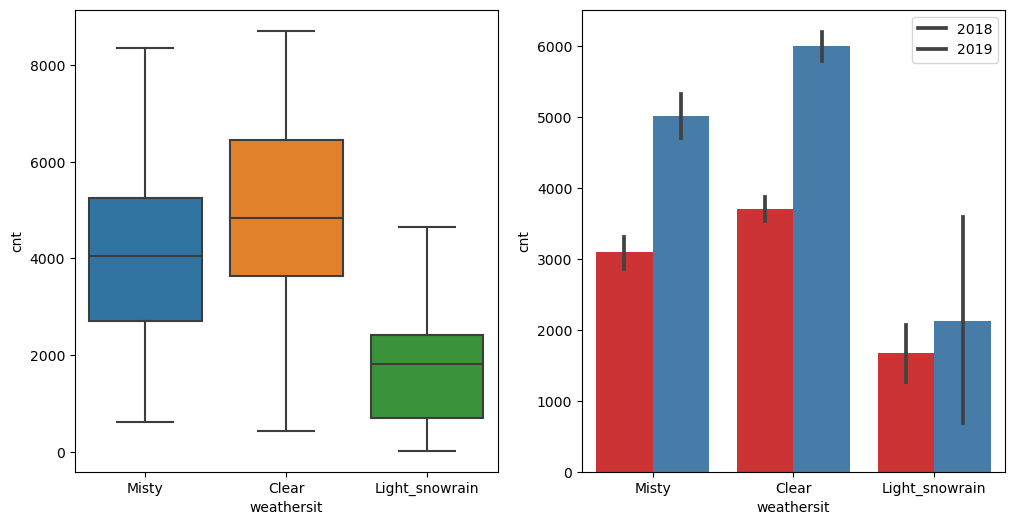

In [23]:
Plotting_cat_col('weathersit')

#### Highest bookings are when the weather is clear and low when its snowing

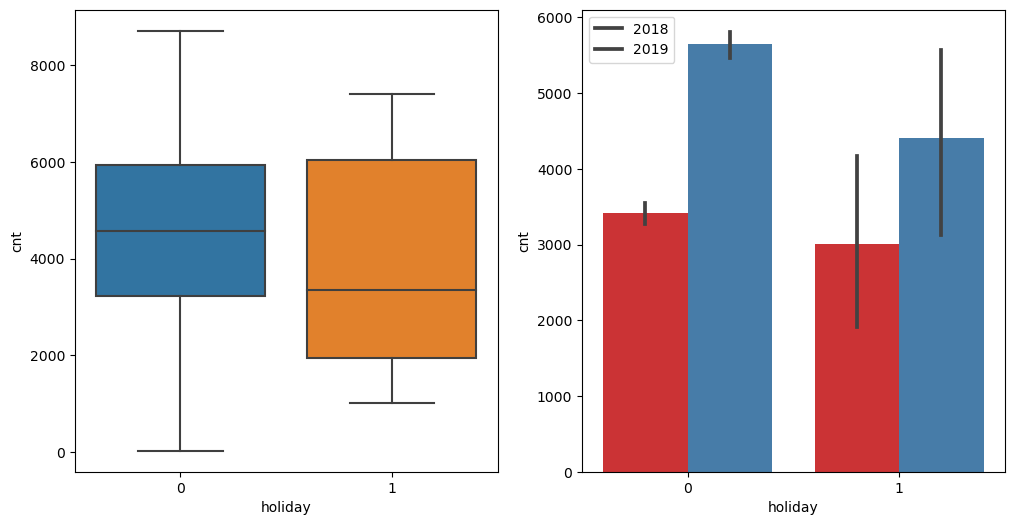

In [24]:
Plotting_cat_col('holiday')

#### holidays have more bookings .

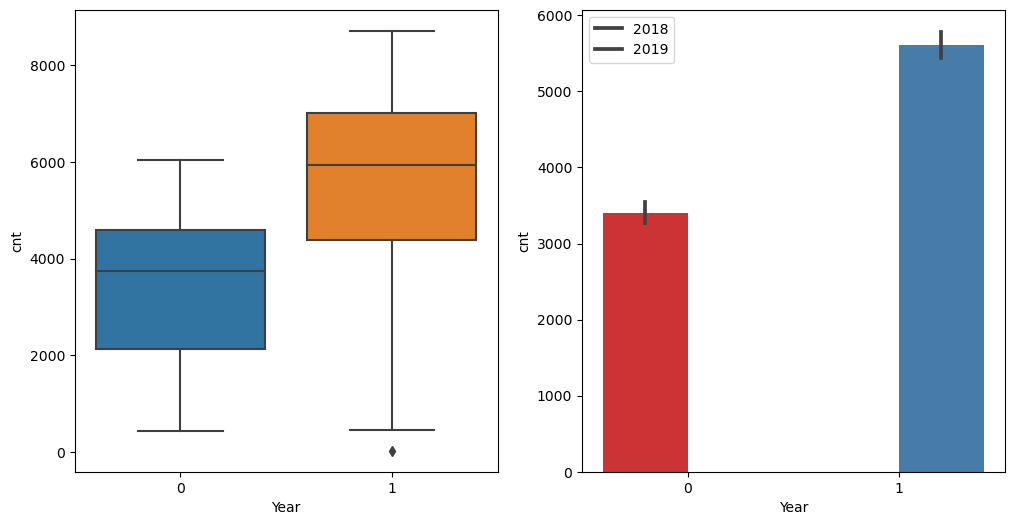

In [25]:
Plotting_cat_col('Year')

#### 2019 has more booking than 2018

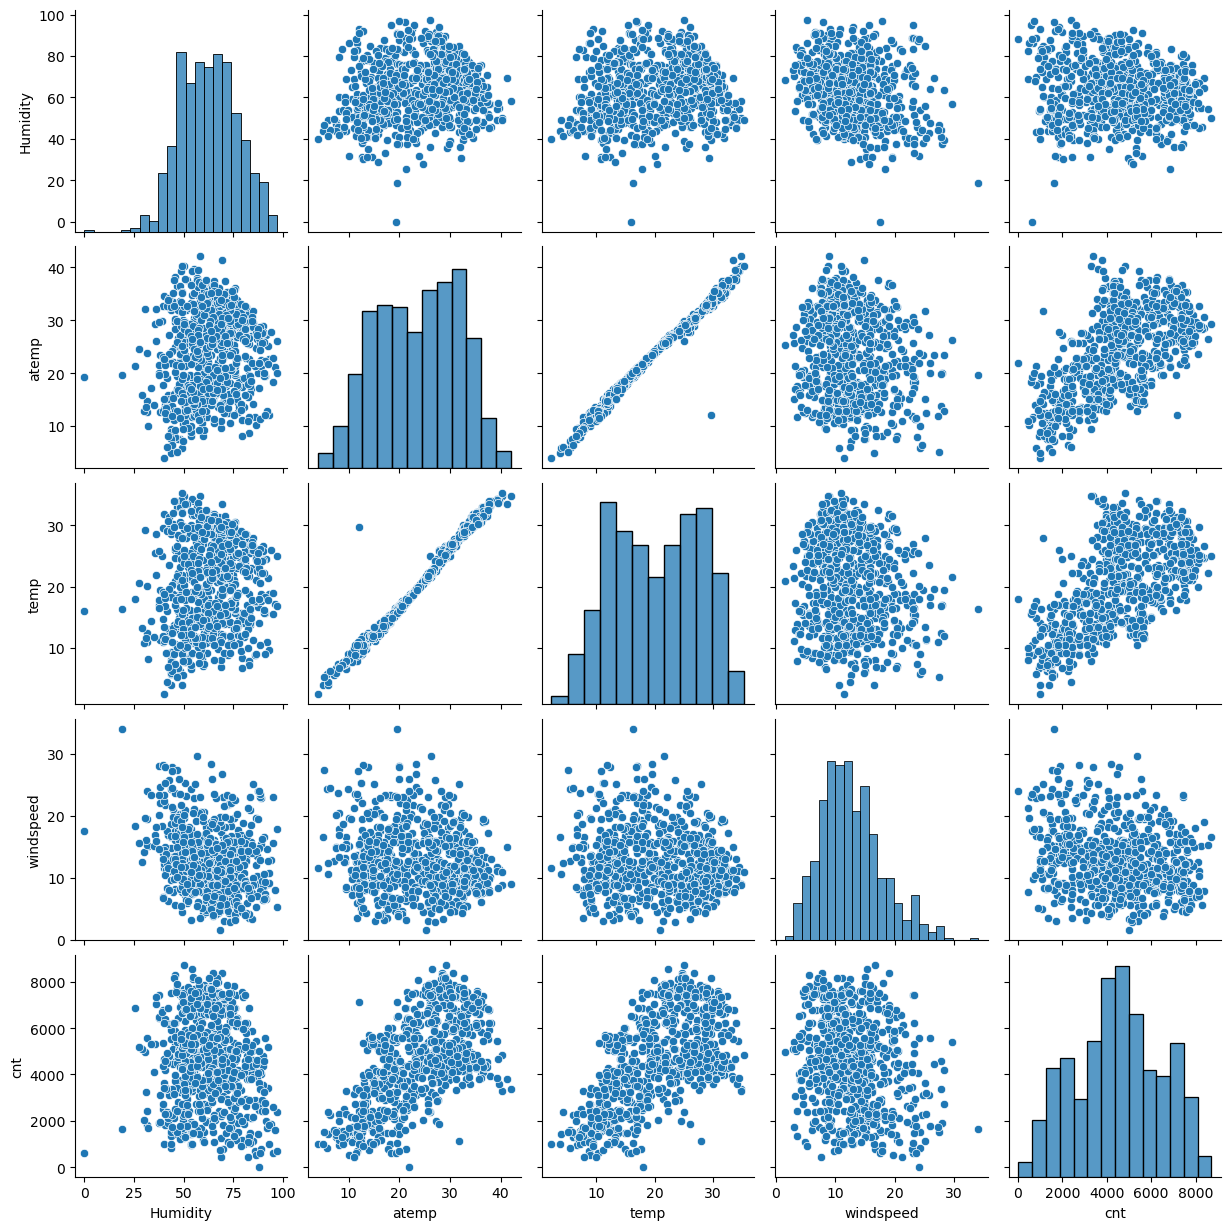

In [26]:
# analysing numerical columns
var=['Humidity','atemp','temp','windspeed','cnt']
sns.pairplot(data=day_df,vars=var)
plt.show()

### Correlation matrix

<AxesSubplot:>

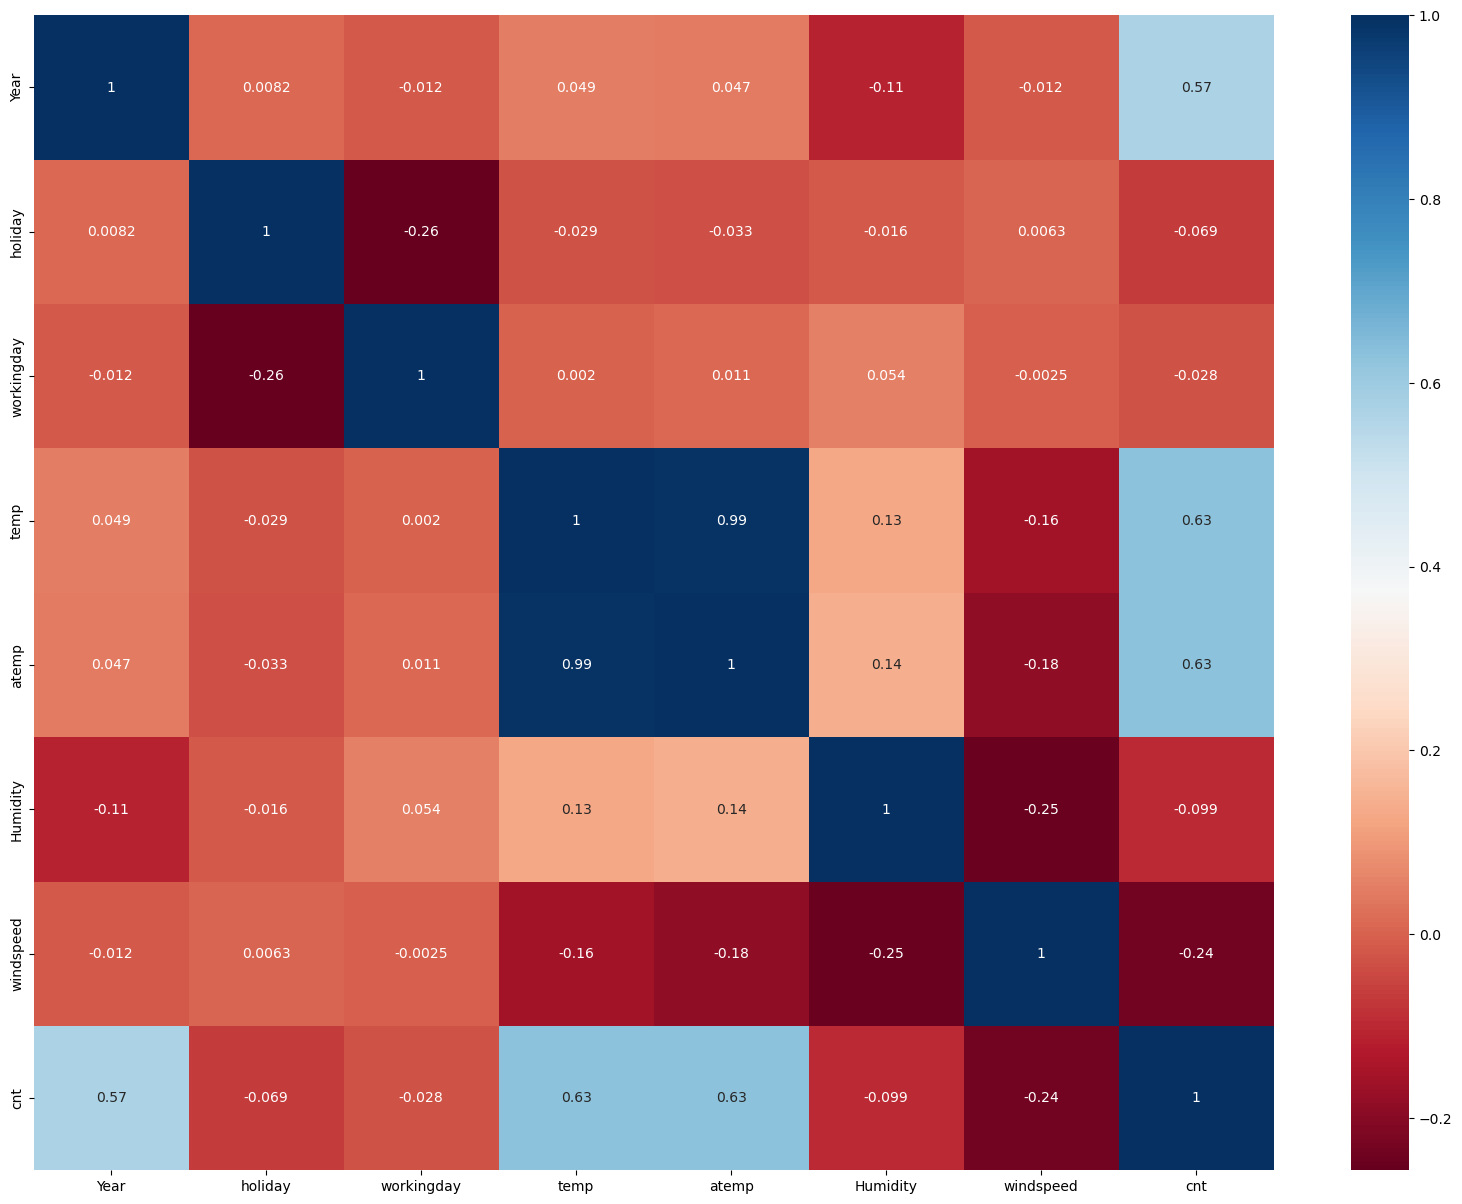

In [27]:
plt.figure(figsize=[20,15])
sns.heatmap(day_df.corr(),annot=True,cmap='RdBu')

### creating dummy variables

In [28]:
dummy_col=['Month','weekday','season','weathersit']

In [29]:
dummy_data=pd.get_dummies(day_df[dummy_col],drop_first=True)
dummy_data.head()

,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
day_df=pd.concat([day_df,dummy_data],axis=1)

In [31]:
day_df=day_df.drop(columns=dummy_col)

### Data splitting

In [32]:
np.random.seed(0)
bike_train,bike_test=train_test_split(day_df,train_size=0.7,random_state=100)

In [33]:
bike_train.shape

(510, 30)

In [34]:
bike_test.shape

(220, 30)

### Data transformation

In [35]:
scaler=MinMaxScaler()

In [36]:
# transforming all numerical columns except boolean columns and dummy columns
num_col=['temp','atemp','Humidity','windspeed','cnt']
bike_train[num_col]=scaler.fit_transform(bike_train[num_col])

In [37]:
bike_train.head(10)

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_Light_snowrain,weathersit_Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,1,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,1,0,0,0,1,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,0,1,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,0,1,0,0,0,0,1,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,1,0,0,0,0,1,0,0,1
580,1,0,0,0.914852,0.882350,0.632030,0.462538,0.782559,1,0,...,0,1,0,0,0,0,0,0,0,0
500,1,0,1,0.719639,0.678508,0.719193,0.172431,0.851588,0,0,...,0,0,1,0,0,0,1,0,0,0
479,1,0,1,0.520271,0.513565,0.440962,0.164434,0.710308,0,0,...,0,0,1,0,0,0,1,0,0,0
472,1,0,1,0.503656,0.496135,0.586518,0.270032,0.499885,0,0,...,0,0,1,0,0,0,1,0,0,1
455,1,0,1,0.456929,0.443956,0.696865,0.279394,0.692476,0,0,...,0,0,0,0,0,0,1,0,0,1


### Analysing manually using correlation coefficent

<AxesSubplot:>

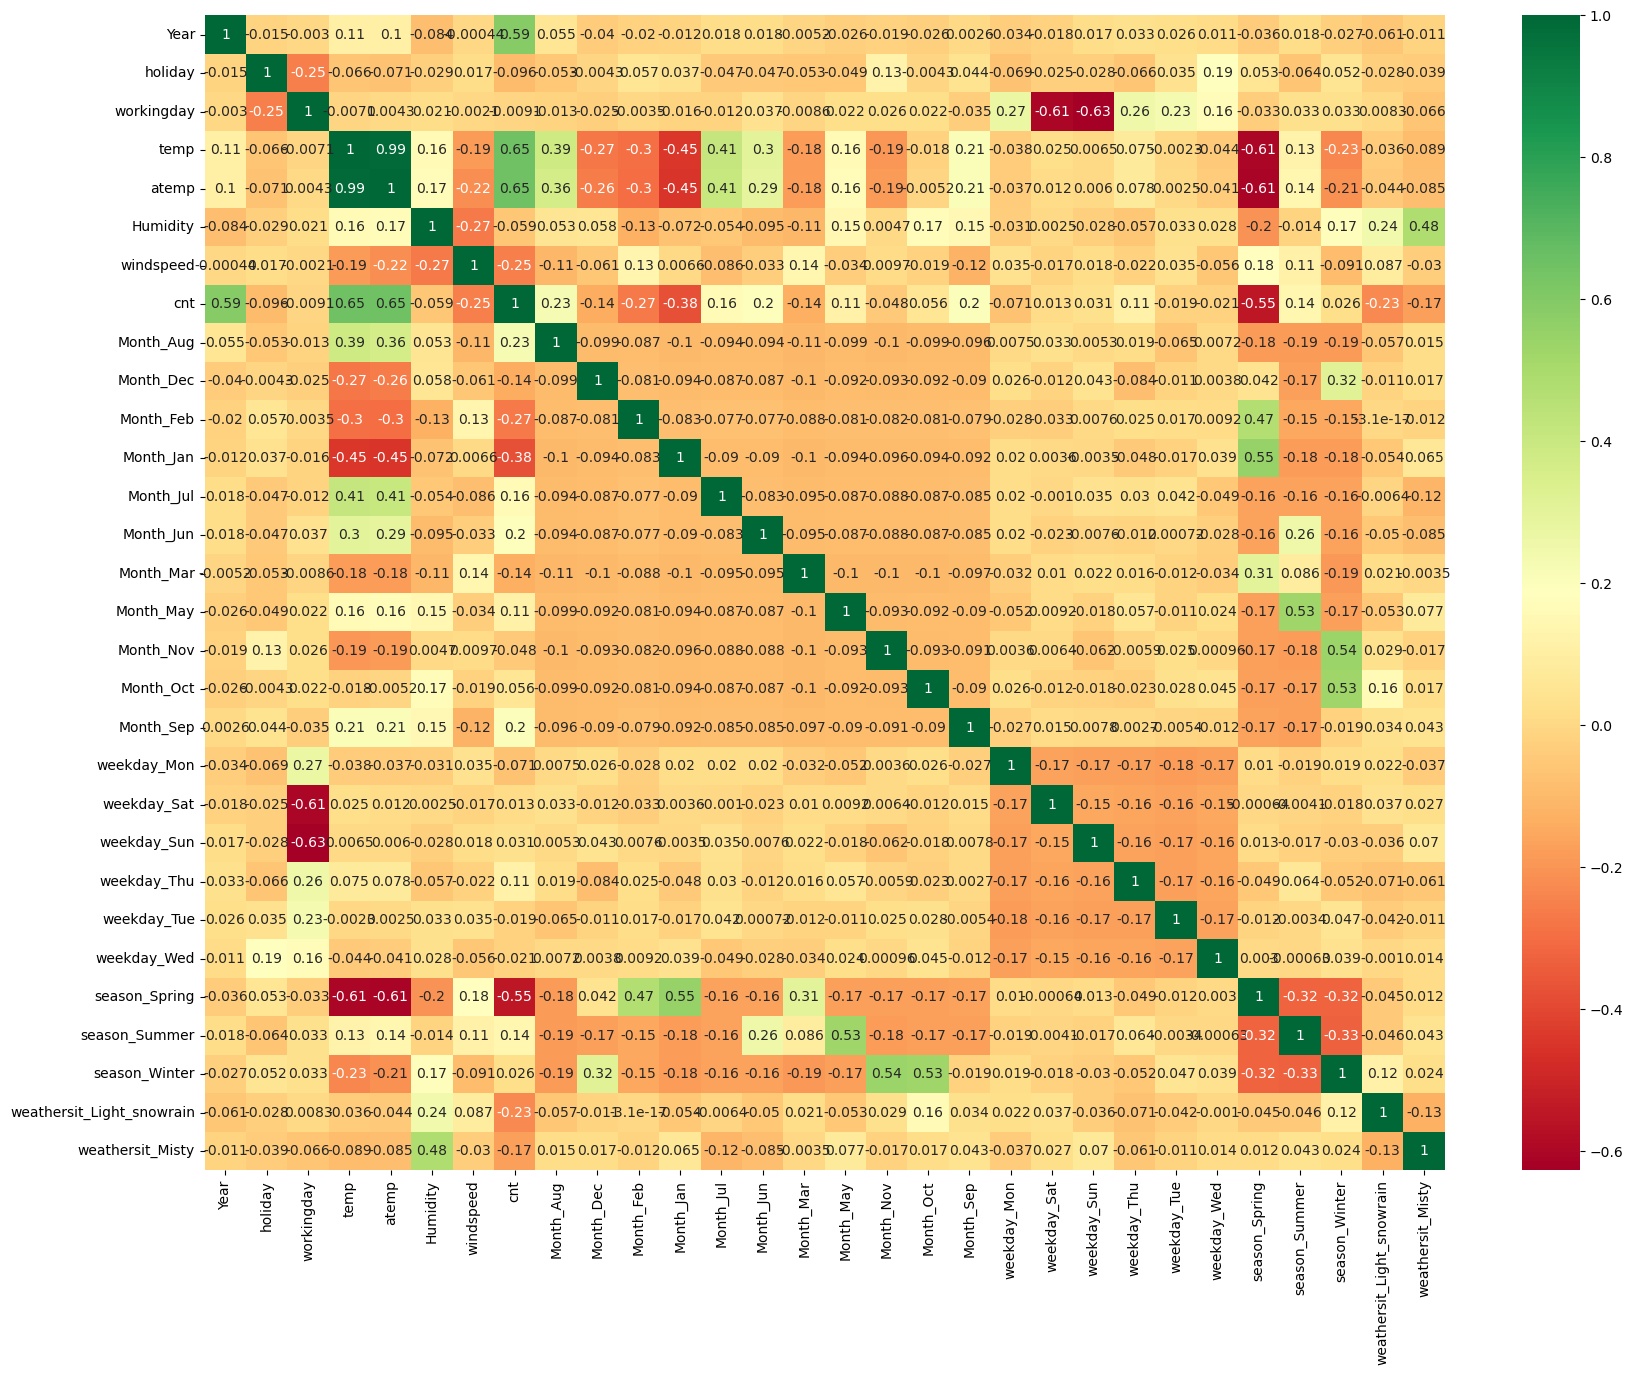

In [38]:
plt.figure(figsize=[20,15])
sns.heatmap(bike_train.corr(),annot=True,cmap='RdYlGn')

#### Humidity and misty is showing some correlation, months november and october show correlation in winter similarly jan and feb show with spring and may show with summer

### Building linear model

#### Divinding X and Y sets

In [39]:
y_biketrain=bike_train.pop('cnt')
x_biketrain=bike_train

#### Recursive feature elimination

In [40]:
lm=LinearRegression()
lm.fit(x_biketrain,y_biketrain)
rfe=RFE(lm,n_features_to_select=15)
rfe=rfe.fit(x_biketrain,y_biketrain)

In [41]:
# top 15 selected variables in list
list(zip(x_biketrain,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Month_Aug', False, 10),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 2),
 ('Month_Jan', True, 1),
 ('Month_Jul', True, 1),
 ('Month_Jun', False, 12),
 ('Month_Mar', False, 15),
 ('Month_May', False, 9),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 13),
 ('Month_Sep', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 5),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 7),
 ('weekday_Wed', False, 11),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', True, 1)]

In [42]:
column=x_biketrain.columns[rfe.support_]
column

Index(['Year', 'holiday', 'temp', 'Humidity', 'windspeed', 'Month_Dec',
       'Month_Jan', 'Month_Jul', 'Month_Nov', 'Month_Sep', 'season_Spring',
       'season_Summer', 'season_Winter', 'weathersit_Light_snowrain',
       'weathersit_Misty'],
      dtype='object')

In [43]:
# rejected columns
x_biketrain.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Month_Aug', 'Month_Feb', 'Month_Jun',
       'Month_Mar', 'Month_May', 'Month_Oct', 'weekday_Mon', 'weekday_Sat',
       'weekday_Sun', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

In [44]:
# function for vif calculations
def cal_vif(df):
    vif=pd.DataFrame()
    vif['Features']=df.columns
    vif['VIF']=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    cif=vif.sort_values(by='VIF',ascending=False)
    return vif

In [45]:
#df with rfe selected values
x_biketrain_rfe=x_biketrain[column]

In [46]:
#calculate vif
cal_vif(x_biketrain_rfe)

,Features,VIF
0,Year,2.09
1,holiday,1.06
2,temp,17.79
3,Humidity,30.89
4,windspeed,4.72
5,Month_Dec,1.56
6,Month_Jan,1.75
7,Month_Jul,1.59
8,Month_Nov,1.85
9,Month_Sep,1.41


#### Humidity has high vif

In [47]:
# building linear model one
x_bike_lm_1=sm.add_constant(x_biketrain_rfe)
lr1=sm.OLS(y_biketrain,x_bike_lm_1).fit()
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Wed, 31 May 2023   Prob (F-statistic):          8.15e-189
Time:                        11:00:57   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Though Vif seems to be good lets see if we can reduce it 

In [48]:
# humdity is high so we can drop this 
x_biketrain_rfe=x_biketrain_rfe.drop(['Humidity'],axis=1)
# calculating vif for new model
cal_vif(x_biketrain_rfe)

,Features,VIF
0,Year,2.07
1,holiday,1.06
2,temp,5.17
3,windspeed,4.67
4,Month_Dec,1.47
5,Month_Jan,1.66
6,Month_Jul,1.59
7,Month_Nov,1.81
8,Month_Sep,1.35
9,season_Spring,2.89


In [49]:
# building linear model two
x_bike_lm_2=sm.add_constant(x_biketrain_rfe)
lr2=sm.OLS(y_biketrain,x_bike_lm_2).fit()
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Wed, 31 May 2023   Prob (F-statistic):          4.75e-186
Time:                        11:00:57   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [50]:
# seems like we should drop Month_Nov variable as it has high p-value
x_biketrain_rfe=x_biketrain_rfe.drop(['Month_Nov'],axis=1)
# calculating vif again
cal_vif(x_biketrain_rfe)

,Features,VIF
0,Year,2.07
1,holiday,1.04
2,temp,5.14
3,windspeed,4.62
4,Month_Dec,1.29
5,Month_Jan,1.65
6,Month_Jul,1.59
7,Month_Sep,1.34
8,season_Spring,2.89
9,season_Summer,2.24


### VIF is not much affected .

In [51]:
# building model three
x_bike_lm_3=sm.add_constant(x_biketrain_rfe)
lr_3=sm.OLS(y_biketrain,x_bike_lm_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.0
Date:                Wed, 31 May 2023   Prob (F-statistic):          2.74e-186
Time:                        11:00:58   Log-Likelihood:                 502.67
No. Observations:                 510   AIC:                            -977.3
Df Residuals:                     496   BIC:                            -918.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [52]:
# seems like we should drop Month_Dec variable as it has high p-value
x_biketrain_rfe=x_biketrain_rfe.drop(['Month_Dec'],axis=1)
# calculating vif again
cal_vif(x_biketrain_rfe)

,Features,VIF
0,Year,2.07
1,holiday,1.04
2,temp,5.13
3,windspeed,4.62
4,Month_Jan,1.61
5,Month_Jul,1.59
6,Month_Sep,1.34
7,season_Spring,2.75
8,season_Summer,2.24
9,season_Winter,1.78


In [53]:
# building model four
x_bike_lm_4=sm.add_constant(x_biketrain_rfe)
lr_4=sm.OLS(y_biketrain,x_bike_lm_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Wed, 31 May 2023   Prob (F-statistic):          8.14e-187
Time:                        11:00:59   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [54]:
# seems like we should drop Month_Jan variable as it has high p-value
x_biketrain_rfe=x_biketrain_rfe.drop(['Month_Jan'],axis=1)
# calculating vif again
cal_vif(x_biketrain_rfe)

,Features,VIF
0,Year,2.07
1,holiday,1.04
2,temp,5.09
3,windspeed,4.60
4,Month_Jul,1.58
5,Month_Sep,1.34
6,season_Spring,2.08
7,season_Summer,2.23
8,season_Winter,1.78
9,weathersit_Light_snowrain,1.08


In [55]:
# building model five
x_bike_lm_5=sm.add_constant(x_biketrain_rfe)
lr_5=sm.OLS(y_biketrain,x_bike_lm_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Wed, 31 May 2023   Prob (F-statistic):          5.06e-187
Time:                        11:01:00   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [56]:
# seems like we should drop Month_Jul variable as it has high p-value
x_biketrain_rfe=x_biketrain_rfe.drop(['Month_Jul'],axis=1)
# calculating vif again
cal_vif(x_biketrain_rfe)

,Features,VIF
0,Year,2.07
1,holiday,1.04
2,temp,3.84
3,windspeed,4.60
4,Month_Sep,1.23
5,season_Spring,1.99
6,season_Summer,1.90
7,season_Winter,1.63
8,weathersit_Light_snowrain,1.08
9,weathersit_Misty,1.55


### Vif value is below 5 and is good

In [57]:
# building model six
x_bike_lm_6=sm.add_constant(x_biketrain_rfe)
lr_6=sm.OLS(y_biketrain,x_bike_lm_6).fit()
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Wed, 31 May 2023   Prob (F-statistic):          1.47e-186
Time:                        11:01:01   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### we can consider model 6 and there is low multicollinearity and all p values are under control and can say model is significant

In [58]:
# parameters of model 6
lr_6.params

const                        0.190855
Year                         0.234132
holiday                     -0.096316
temp                         0.477737
windspeed                   -0.148098
Month_Sep                    0.090998
season_Spring               -0.055406
season_Summer                0.062076
season_Winter                0.094476
weathersit_Light_snowrain   -0.285031
weathersit_Misty            -0.078741
dtype: float64

### Assuptions of normally distributed error terms

In [59]:
y_biketrain_pred=lr_6.predict(x_bike_lm_6)

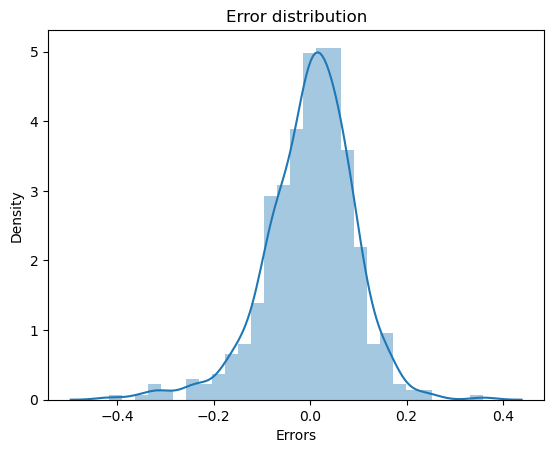

In [60]:
# error normality
fig=plt.figure()
sns.distplot((y_biketrain-y_biketrain_pred))
plt.title('Error distribution')
plt.xlabel('Errors')
plt.show()

#### this follows normal distribution

### .
### Assumptions of independent error terms
### Homoscedasticity

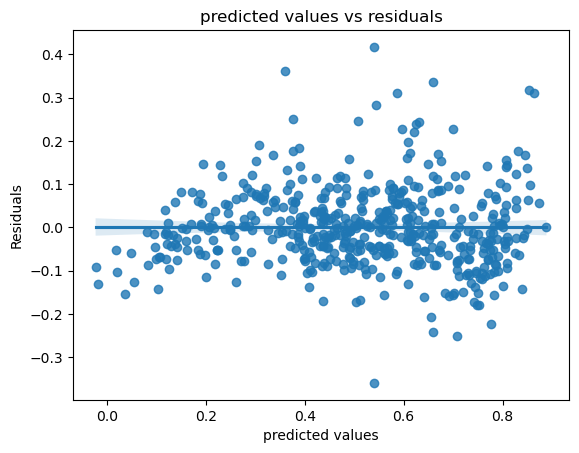

In [61]:
sns.regplot(x=y_biketrain_pred,y=y_biketrain_pred-y_biketrain)
plt.title('predicted values vs residuals')
plt.xlabel('predicted values')
plt.ylabel('Residuals')
plt.show()

### there is no relation between residuals and predicted value

### Linear realtionship

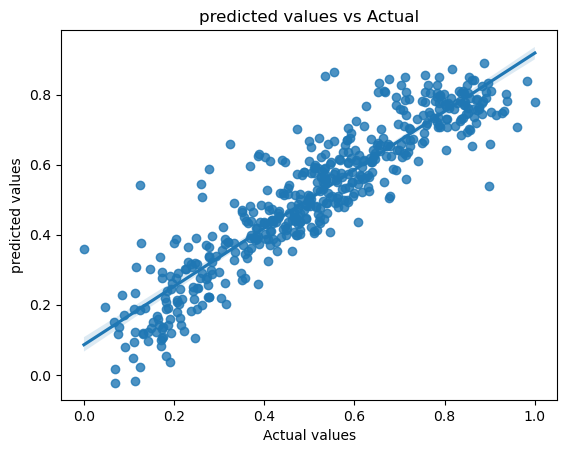

In [62]:
sns.regplot(x=y_biketrain,y=y_biketrain_pred)
plt.title('predicted values vs Actual')
plt.xlabel('Actual values')
plt.ylabel('predicted values')
plt.show()

### Multicollinearity

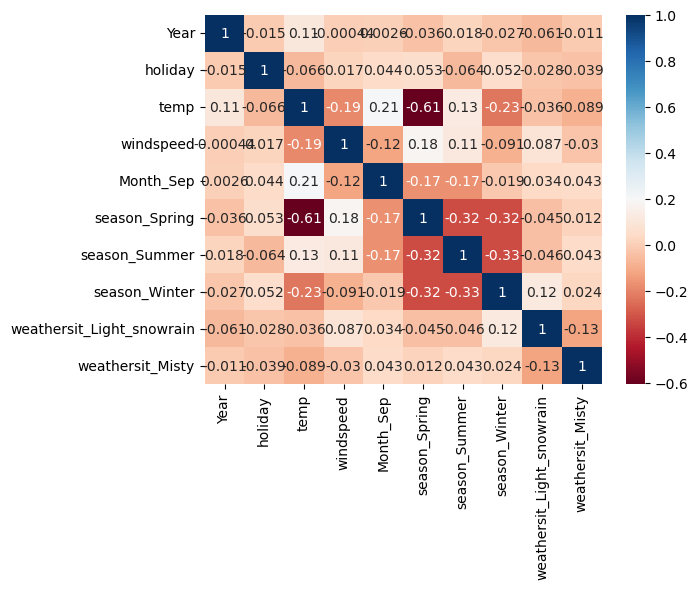

In [63]:
sns.heatmap(x_biketrain_rfe.corr(),annot=True,cmap='RdBu')
plt.show()

### As values are less than 5 there is no multicollinearity

## Prediction on testing data

In [64]:
num_col=['Humidity','atemp','temp','windspeed','cnt']
bike_test[num_col]=scaler.fit_transform(bike_test[num_col])
bike_test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_Light_snowrain,weathersit_Misty
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,1,0,0,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,0,...,0,0,1,0,0,0,1,0,0,0
299,0,0,0,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,0,0,1,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.821739,0.749249,0.070765,0.682387,0.569148,0,0,...,1,0,0,0,0,0,1,0,0,0


In [65]:
bike_test.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,cnt,Month_Aug,Month_Dec,...,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,season_Spring,season_Summer,season_Winter,weathersit_Light_snowrain,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.546074,0.530791,0.508362,0.418803,0.517923,0.059091,0.086364,...,0.172727,0.154545,0.140909,0.122727,0.159091,0.254545,0.263636,0.236364,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.248645,0.227648,0.200875,0.187683,0.239498,0.236333,0.281541,...,0.378873,0.362295,0.348721,0.328872,0.366595,0.436599,0.441609,0.425817,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [66]:
y_test_data=bike_test.pop('cnt')
x_test_data=bike_test

In [67]:
x_test_data=x_test_data[x_biketrain_rfe.columns]

In [68]:
x_test_lm_6=sm.add_constant(x_test_data)

In [69]:
y_pred_data=lr_6.predict(x_test_lm_6)

In [70]:
r2=r2_score(y_test_data,y_pred_data)
round(r2,3)

0.793

### Model evaluation

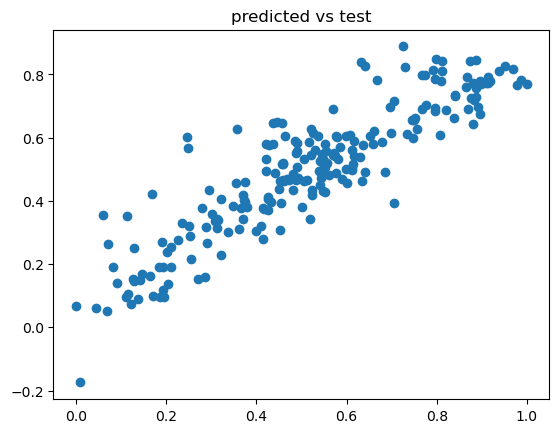

In [71]:
fig=plt.figure()
plt.scatter(y_test_data,y_pred_data)
plt.title('predicted vs test')
plt.show()

### Adjusted r2

In [72]:
r2=0.7935
n=x_test_data.shape[0]
p=x_test_data.shape[1]

In [73]:
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
round(adjusted_r2,3)

0.784

## final results
### Train r^2=0.833
### train adjusted r^2=0.829
### test r^2=0.793
### test adjusted r^2=0.784